# 4.대중교통 데이터 프로젝트
## 4.1. 대중교통 데이터 시각화 하기
### 4.1.1. 유임 승차 비율이 가장 높은 역 찾기

In [1]:
import csv
f= open('C:/Users/nadai/code/data/subwayfee.csv')
data=csv.reader(f)
next(data)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']

In [2]:
import csv
f= open('C:/Users/nadai/code/data/subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0
mx_station=''

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] !=0 and (row[4]+row[6])>100000: 
        rate=row[4]/(row[4]+row[6])
        if rate>mx:
            mx=rate
            mx_station=row[3]+' '+row[1]

print(mx_station, round(mx*100,2))

홍대입구 2호선 95.34


### 4.1.2. 유임 승하차 인원이 가장 많은 역 찾기

In [3]:
import csv
f= open('C:/Users/nadai/code/data/subwayfee.csv')
data=csv.reader(f)
next(data)
mx=[0]*4
mx_station=['']*4
label=['유임승차', '유임하차','무임승차', '무임하차']
for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
        if row[i]>mx[i-4]:
            mx[i-4]=row[i]
            mx_station[i-4]=row[3]+' '+row[1]
            
for i in range(4):
    print(label[i]+':'+mx_station[i], mx[i])

유임승차:강남 2호선 3153418
유임하차:강남 2호선 3210437
무임승차:종로3가 1호선 387062
무임하차:제기동 1호선 400607


### 4.1.3. 모든 역의 유무임 승하차 비율을 파이 차트로 나타내기

In [ ]:
import csv
import matplotlib.pyplot as plt

f= open('C:/Users/nadai/code/data/subwayfee.csv')
data=csv.reader(f)
next(data)
label=['유임승차', '유임하차','무임승차', '무임하차']
c=["#14CCC0","#389993","#FF1C6A","#CC14AF"]
plt.rc('font', family='Malgun Gothic')

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3]+' '+row[1])
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.savefig(row[3]+' '+row[1]+".png")
    plt.show()

### 4.2. 지하철 시간대별 데이터 시각화하기
### 4.2.1. 출근 시간대 사람들이 가장 많이 타고 내리는 역 찾기

In [4]:
import csv
f = open('C:/Users/nadai/code/data/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
for row in data :
    row[4:] = map(int, row[4:])
    a = row[11:16:2]
    if sum(a) > mx :
        mx = sum(a)
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

강남(2호선) 984427


### 4.2.2. 밤 11시에 사람들이 가장 많이 타고 내리는 역을 찾는 코드

In [5]:
import csv
f = open('C:/Users/nadai/code/data/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
t = int(input('몇 시의 승차인원이 가장 많은 역이 궁금하세요? : '))
for row in data :
    row[4:] = map(int, row[4:])
    a = row[2 * t - 4]
    if a > mx :
        mx = a
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

몇 시의 승차인원이 가장 많은 역이 궁금하세요? : 23
강남(2호선) 145504


### 4.2.3. 시간대별로 하차 인원이 가장 많은 역을 찾는 코드

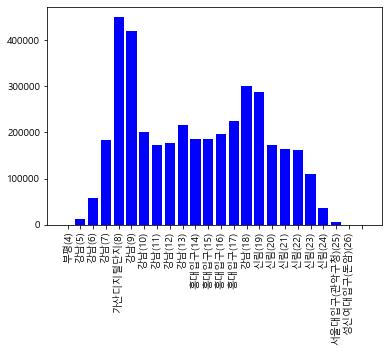

In [6]:
import csv
import matplotlib.pyplot as plt
f = open('C:/Users/nadai/code/data/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx = [0] * 24
mx_station = [''] * 24
for row in data :
    row[4:] = map(int, row[4:])
    for j in range(24) :
        b = row[5 + j * 2]
        if b > mx[j] :
            mx[j] = b
            mx_station[j] = row[3]+'('+str(j+4)+')'

plt.rc('font',family = 'Malgun Gothic')
plt.bar(range(24), mx, color = 'b')
plt.xticks(range(24), mx_station, rotation = 90)
plt.show()

### 4.2.4. 자하철 시간대별 승하차 인원 추이를 나타내는 코드

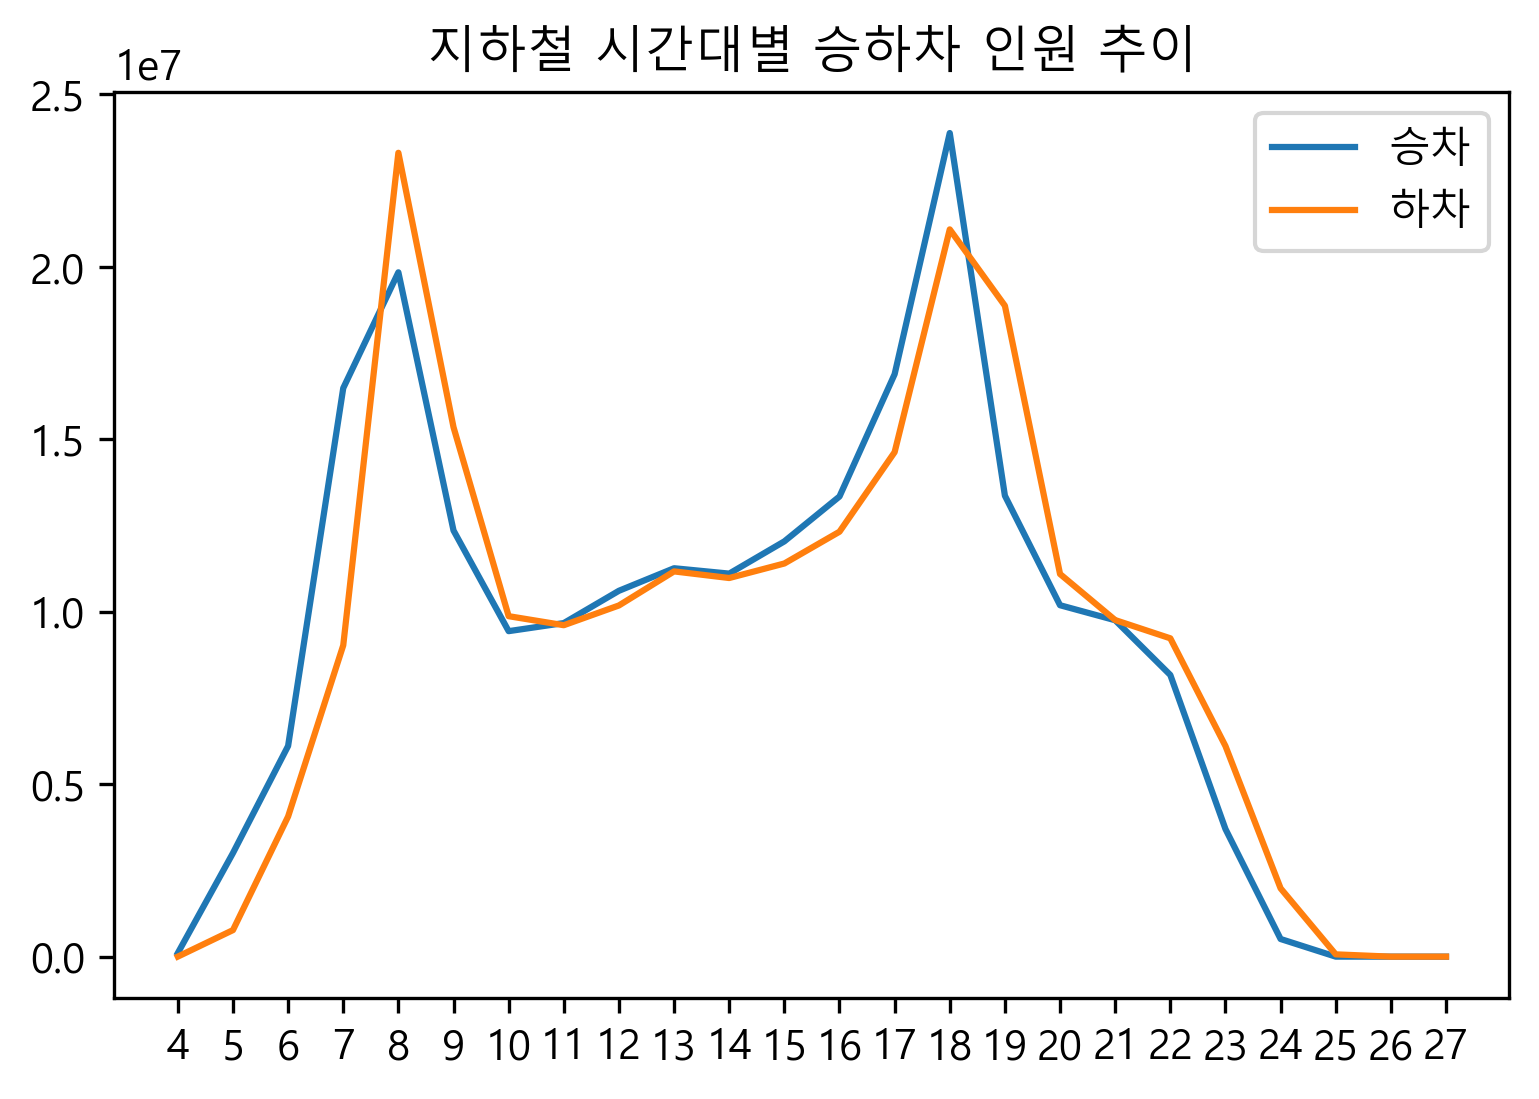

In [7]:
import csv
f = open('C:/Users/nadai/code/data/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
s_in = [0] * 24
s_out = [0] * 24
for row in data :
    row[4:] = map(int, row[4:])
    for i in range(24) :
        s_in[i] += row[4 + i * 2]
        s_out[i] += row[5 + i * 2]
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
plt.rc('font', family = 'Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label = '승차')
plt.plot(s_out, label = '하차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()